# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 01. Importing Dataframe

In [4]:
df = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv',index_col = False)

/var/folders/gv/sm1b476s1zz2r143g9h9qgj40000gq/T/ipykernel_33783/96195919.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv',index_col = False)


In [6]:
death_cases_gender = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv',index_col = False)

/var/folders/gv/sm1b476s1zz2r143g9h9qgj40000gq/T/ipykernel_33783/3866303451.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  death_cases_gender = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv',index_col = False)


In [9]:
death_cases_gender.dtypes

Unnamed: 0             int64
county_code          float64
county                object
state                 object
lat                  float64
long                 float64
date                  object
cases                  int64
state_code            object
deaths                 int64
male                   int64
female                 int64
median_age           float64
population             int64
female_percentage    float64
region                object
dtype: object

In [8]:
#change the datatype of the state_code column 
death_cases_gender['state_code'] = death_cases_gender['state_code'].astype(str)

## Data prep for regression analysis

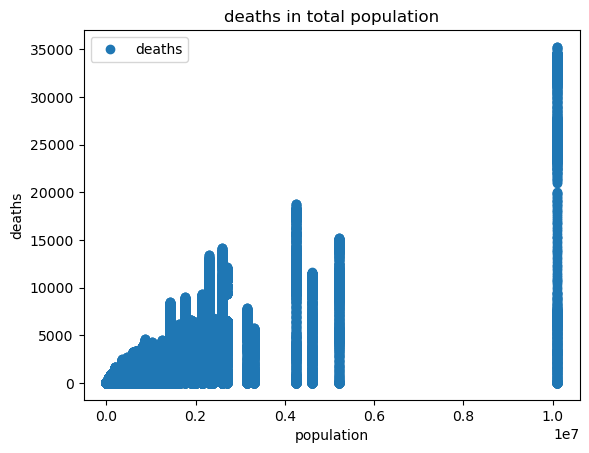

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'population', y='deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('deaths in total population')  
plt.xlabel('population')  
plt.ylabel('deaths')  
plt.show()

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['population'].values.reshape(-1,1)
y = df['deaths'].values.reshape(-1,1)

In [14]:
X

array([[55200],
       [55200],
       [55200],
       ...,
       [ 7100],
       [ 7100],
       [ 7100]])

In [16]:
y

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [22],
       [22],
       [23]])

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

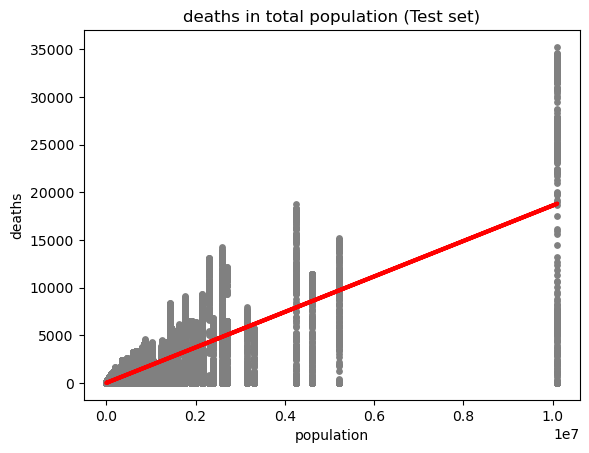

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('deaths in total population (Test set)')
plot_test.xlabel('population')
plot_test.ylabel('deaths')
plot_test.show()

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00186198]]
Mean squared error:  193054.92116814022
R2 score:  0.6526241269900244


In [24]:
y_predicted

array([[115.28213114],
       [386.01948792],
       [ 22.98382384],
       ...,
       [ 41.60920145],
       [ 21.20190978],
       [ 15.68300353]])

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,227,115.282131
1,194,386.019488
2,17,22.983824
3,1,53.214918
4,278,83.168576
5,152,56.173602
6,29,7.259410
7,184,415.215321
8,1,30.290230
9,224,103.069410


### Compare how the regression fits the training set

In [26]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00186198]]
Mean squared error:  190298.03278122545
R2 score:  0.6589772181603019


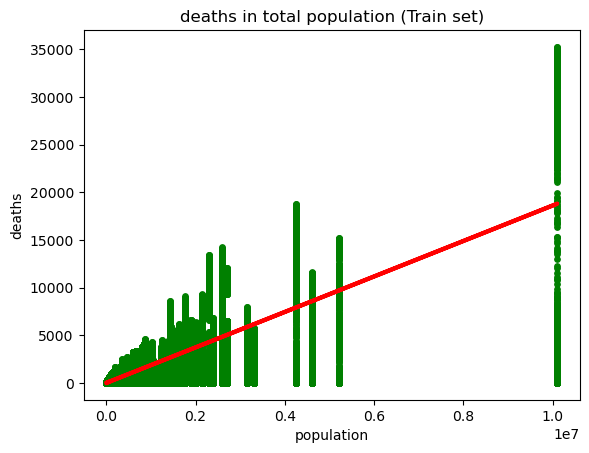

In [29]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('deaths in total population (Train set)')
plot_test.xlabel('population')
plot_test.ylabel('deaths')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [33]:
# Clean the extreme values from the "deaths" variable observed during the consistency checks.

df_test = df[df['deaths'] <=10000] 

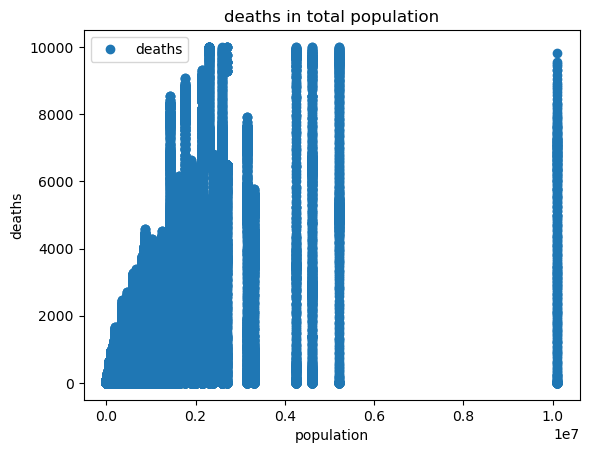

In [34]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'population', y='deaths', style='o')  
plt.title('deaths in total population')  
plt.xlabel('population')  
plt.ylabel('deaths')  
plt.show()

In [35]:
# Reshape again.

X_2 = df_test['population'].values.reshape(-1,1)
y_2 = df_test['deaths'].values.reshape(-1,1)

In [36]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [37]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [38]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [39]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00136454]]
Mean squared error:  114445.14226988034
R2 score:  0.541371904536844


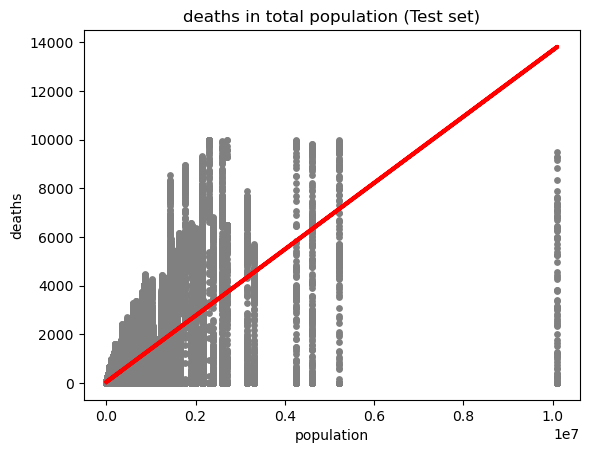

In [41]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('deaths in total population (Test set)')
plot_test.xlabel('population')
plot_test.ylabel('deaths')
plot_test.show()

In [42]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,380,430.331984
1,486,228.398980
2,195,95.966156
3,37,81.463811
4,47,68.065380
5,8,36.892435
6,46,44.843617
7,31,45.307561
8,27,63.371358
9,0,160.300183
